In [1]:
# supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the Uber Request Data.csv file 

UberData = pd.read_csv('Uber Request Data.csv', encoding='ISO-8859-1')
UberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
#inspecting the file 

print(UberData.shape)
print(UberData.columns)
print(UberData.info())
print(UberData.describe())

(6745, 6)
Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [5]:
#finding the percentage and sum of Null values in each column

print(round(100*(UberData.isnull().sum()/len(UberData.index)), 2))
print(UberData.isnull().sum())

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


### <font color = black>Although there are high percentage of missing values in the UberData dataframe but they cannot be removed as they are important for the *analysis purpose*</font>

In [6]:
#converting "Request timestamp" to datetime datatype from object

UberData['Request timestamp'] =  pd.to_datetime(UberData['Request timestamp'],  dayfirst=True)

In [7]:
#converting "Drop timestamp" to datetime datatype from object

UberData['Drop timestamp'] = pd.to_datetime(UberData['Drop timestamp'], dayfirst=True)

In [8]:
#Checking the datatype of 'Request timetsamp' and 'Drop timestamp'

print(UberData.info())
#Checking if they are converted perfectly or not

print(UberData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB
None
      Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport     

In [9]:
#Creating 'Request timeslot' column from the 'Request timestamp' like Night, Morning, Afternoon, Evening

UberData['Request Timeslots'] = pd.cut(UberData['Request timestamp'].dt.hour,[0,6,12,16,24],labels=['Night','Morning','Afternoon','Evening'])
UberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timeslots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Night
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Night
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Night


Question 1: Visually identify the most pressing problems for Uber.

In [10]:
#Filtering out 'Cancelled' & 'No Cars Available' from the status column and storing it to a new dataframe name Result1
#Result1 will be used to plot the first result question to "Visually identify the most pressing problems for Uber".
#This is done to find out the problems for Uber as Cars getting Cancelled and No cars Available are what cause problem for Uber
Status_Filter = UberData[UberData.Status != 'Trip Completed']
Result1 = pd.DataFrame(Status_Filter)
Result1

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timeslots
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,Night
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,Evening
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,Morning
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,Evening
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,Evening
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,Morning
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,Evening
2839,80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT,Night
2840,534,City,3.0,Cancelled,2016-07-11 10:01:00,NaT,Morning


In [11]:
#Checking the result for plot 1 numerically
Result1.groupby(['Status', 'Pickup point', 'Request Timeslots']).Status.count()

Status             Pickup point  Request Timeslots
Cancelled          Airport       Night                  10
                                 Morning                39
                                 Afternoon              40
                                 Evening               109
                   City          Night                 373
                                 Morning               579
                                 Afternoon              32
                                 Evening                79
No Cars Available  Airport       Night                 125
                                 Morning                51
                                 Afternoon              50
                                 Evening              1457
                   City          Night                 288
                                 Morning               335
                                 Afternoon             134
                                 Evening               154
Name:

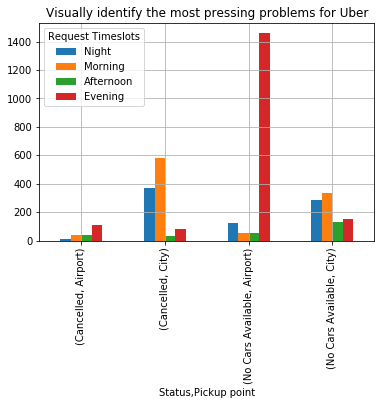

In [12]:
#Result 1 plot for "Visually identify the most pressing problems for Uber".
Result1.groupby(['Status', 'Pickup point', 'Request Timeslots']).Status.count().unstack().plot.bar(legend=True)
plt.grid()
plt.title("Visually identify the most pressing problems for Uber")
plt.show()

Question 2: Find out the gap between supply and demand and show the same using plots.

In [13]:
#From the given dataset UberData Supply can be understood as the count of 'Trip Completed'
#Creating a Derived Matrics 'Supply' column from 'Status' containing only 'Trips Completed'
UberData['Supply'] = UberData['Status'].where(UberData['Status'].isin(['Trip Completed']))
UberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timeslots,Supply
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Morning,Trip Completed
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,Trip Completed
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning,Trip Completed
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Evening,Trip Completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Evening,Trip Completed
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Night,Trip Completed
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Night,Trip Completed
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Evening,Trip Completed
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Night,Trip Completed


In [14]:
#From the given dataset UberData Supply Gap can be understood as the count of 'Cancelled' + 'No Cars Available'
#Creating a Derived Matrics 'Supply_Gap' column from 'Status' containing 'Cancelled' & 'No Cars Available' variables
UberData['Supply_Gap'] = UberData['Status'].where(UberData['Status'].isin(['Cancelled', 'No Cars Available']))
UberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timeslots,Supply,Supply_Gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Morning,Trip Completed,NaN
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,Trip Completed,NaN
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning,Trip Completed,NaN
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Evening,Trip Completed,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed,NaN
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Evening,Trip Completed,NaN
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Night,Trip Completed,NaN
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Night,Trip Completed,NaN
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Evening,Trip Completed,NaN
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Night,Trip Completed,NaN


In [15]:
#From the given dataset UberData Demand can be understood as the count of 'Trip Completed' + 'Cancelled' + 'No Cars Available'
#Storing it to a variable name 'Demand' from 'Status' column containing all the three variables and printing the count 
Demand = UberData.Status.count()
Demand

6745

In [16]:
#From the given dataset UberData Supply can be understood as the count of 'Trip Completed'
#Storing it to a variable name 'Supply' from 'Supply' column containing only 'Trip Completed' variable and printing the count 
Supply = UberData.Supply.count()
Supply

2831

In [17]:
#Gap can be derived as the diffrence between the Demand and Supply i.e. Total Request of Cars by the customers to the  
#Amount of Cars Uber were able to Deliver to the customers.
Gap = Demand - Supply
Gap

3914

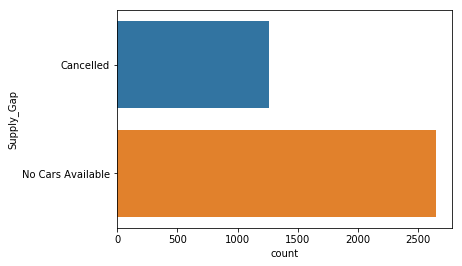

In [18]:
#Plot of the Gap i.e count of 'Cancelled' + 'No Cars Available'
sns.countplot(y="Supply_Gap", data=UberData)
plt.show()

Question 2.1:- Find the time slots when the highest gap exists

In [19]:
#Result 2.1 Counting the numbers where highest gap exist along with the time slots 
UberData.groupby(['Request Timeslots', 'Supply_Gap']).Supply_Gap.count()

Request Timeslots  Supply_Gap       
Night              Cancelled             383
                   No Cars Available     413
Morning            Cancelled             618
                   No Cars Available     386
Afternoon          Cancelled              72
                   No Cars Available     184
Evening            Cancelled             188
                   No Cars Available    1611
Name: Supply_Gap, dtype: int64

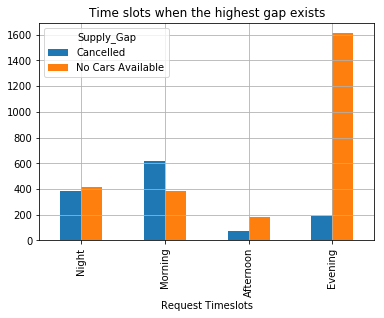

In [20]:
#Result 2.1 Plot for to "Find the time slots when the highest gap exists".
UberData.groupby(['Request Timeslots', 'Supply_Gap']).Supply_Gap.count().unstack().plot.bar(legend=True)
plt.grid()
plt.title("Time slots when the highest gap exists")
plt.show()

Question 2.2:- Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

In [21]:
#Filtering out the frame:- where only the identified timeslot 'Evening' exist 
Filter_Timeslot = UberData[UberData['Request Timeslots'].isin(['Evening'])]

In [22]:
#Result 2.2 Counting the type of request for which the gap is most severe in 'Evening' timeslot 
Filter_Timeslot.groupby(['Pickup point','Request Timeslots']).Supply_Gap.count()

Pickup point  Request Timeslots
Airport       Evening              1566
City          Evening               233
Name: Supply_Gap, dtype: int64

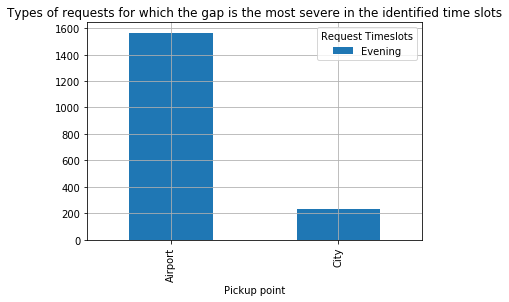

In [23]:
#Result 2.2 plot to "Find the types of requests for which the gap is the most severe in the identified time slots".
Filter_Timeslot.groupby(['Pickup point', 'Request Timeslots']).Supply_Gap.count().unstack().plot.bar(legend=True)
plt.grid()
plt.title("Types of requests for which the gap is the most severe in the identified time slots")
plt.show()